**Задача регрессии (self implementation)**

*Импортируем необходимые библиотеки*

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Создадим класс линейной регрессии, который будет содержать ключевые методы для решения задачи — конструктор класса, метод обучения алгоритма, метод пересчета весов, метод, делающий предсказания на основе найденного уравнения (а также вынесем код изменения весов в отдельный метод, как сказано в методических указаниях):*

In [26]:
class LinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None  
        self.bias = 0 

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.train(X, y, n_samples)

    def train(self, X, y, n_samples):
        for _ in range(self.iterations):
            self._update_weights(X, y, n_samples)

    def _update_weights(self, X, y, n_samples):
        y_pred = np.dot(X, self.weights) + self.bias
        error = y_pred - y

        grad_weights = (1 / n_samples) * np.dot(X.T, error)
        grad_bias = (1 / n_samples) * np.sum(error)

        self.weights -= self.learning_rate * grad_weights
        self.bias -= self.learning_rate * grad_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

*Загрузим данные из csv, а затем создадим модель и сделаем предсказание*

In [27]:
df = pd.read_csv('salary_data.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X, Y)
Y_pred = model.predict(X)

*Вывод результатов и визуализация*

Весa (weights): [9876.11]
Смещение (bias): 22920.49


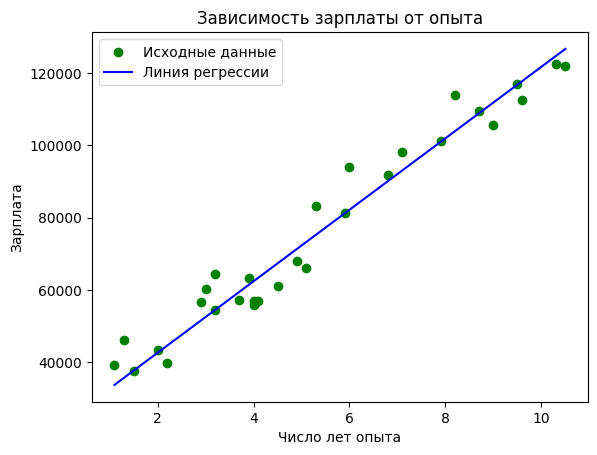

In [28]:
print("Весa (weights):", np.round(model.weights, 2))
print("Смещение (bias):", round(model.bias, 2))

plt.scatter(X, Y, color='green', label='Исходные данные')
plt.plot(X, Y_pred, color='blue', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()
plt.show()